In [10]:
import pandas as pd

# Define file paths
files = {
    "UHI_with_LST": "../data/processed/UHI_with_LST.csv",
    "UHI_with_LST_Sentinel": "../data/processed/UHI_with_LST_Sentinel.csv",
    "UHI_with_LST_Sentinel_Fixed": "../data/processed/UHI_with_LST_Sentinel_Fixed.csv",
    "UHI_with_LST_Sentinel_Final": "../data/processed/UHI_with_LST_Sentinel_Final.csv",
    "UHI_with_LST_Mapped": "../data/processed/UHI_with_LST_Mapped.csv",
    "UHI_Final_Features": "../data/processed/UHI_Final_Features.csv",
    "UHI_Features": "../data/processed/UHI_Features.csv",
    "UHI_Data_Processed": "../data/processed/UHI_Data_Processed.csv",
    "Sentinel_Features": "../data/processed/Sentinel_Features.csv",
    "Landsat_LST": "../data/processed/Landsat_LST.csv",
}

# Expected columns for UHI + Sentinel data
expected_columns = {"Longitude", "Latitude", "datetime", "UHI Index", "Band1", "Band2", "Band3", "Band4"}

# Check each file
for name, path in files.items():
    try:
        df = pd.read_csv(path)
        columns = set(df.columns)
        print(f"📌 Checking {name} - Shape: {df.shape}")

        # Check if required columns exist
        if expected_columns.issubset(columns):
            print(f"✅ {name} contains UHI and Sentinel features!")
        else:
            missing_cols = expected_columns - columns
            print(f"⚠️ {name} is missing columns: {missing_cols}")

        print("-" * 50)
    
    except Exception as e:
        print(f"❌ Could not read {name}: {e}")

📌 Checking UHI_with_LST - Shape: (11229, 5)
⚠️ UHI_with_LST is missing columns: {'Band1', 'Band3', 'Band2', 'Band4'}
--------------------------------------------------
📌 Checking UHI_with_LST_Sentinel - Shape: (11229, 9)
✅ UHI_with_LST_Sentinel contains UHI and Sentinel features!
--------------------------------------------------
📌 Checking UHI_with_LST_Sentinel_Fixed - Shape: (11229, 9)
✅ UHI_with_LST_Sentinel_Fixed contains UHI and Sentinel features!
--------------------------------------------------
📌 Checking UHI_with_LST_Sentinel_Final - Shape: (11229, 9)
✅ UHI_with_LST_Sentinel_Final contains UHI and Sentinel features!
--------------------------------------------------
📌 Checking UHI_with_LST_Mapped - Shape: (11229, 5)
⚠️ UHI_with_LST_Mapped is missing columns: {'Band1', 'Band3', 'Band2', 'Band4'}
--------------------------------------------------
📌 Checking UHI_Final_Features - Shape: (11229, 6)
⚠️ UHI_Final_Features is missing columns: {'Longitude', 'Latitude', 'datetime'}
----

In [11]:
# ✅ Function to Clean Column Names
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()         # Remove leading/trailing spaces
               .str.lower()            # Convert to lowercase
               .str.replace(" ", "_")  # Replace spaces with underscores
               .str.replace(r"\[", "", regex=True)  # Remove opening bracket safely
               .str.replace(r"\]", "", regex=True)  # Remove closing bracket safely
    )
    return df

In [12]:
import pandas as pd

# Define file paths
files = {
    "UHI_with_LST_Sentinel": "../data/processed/UHI_with_LST_Sentinel.csv",
    "UHI_with_LST_Sentinel_Fixed": "../data/processed/UHI_with_LST_Sentinel_Fixed.csv",
    "UHI_with_LST_Sentinel_Final": "../data/processed/UHI_with_LST_Sentinel_Final.csv",
}

# Compare the first few rows
for name, path in files.items():
    df = pd.read_csv(path)
    print(f"📌 {name} - First 5 Rows:")
    print(df.head(), "\n")
    print("-" * 50)

📌 UHI_with_LST_Sentinel - First 5 Rows:
   Longitude   Latitude          datetime  UHI Index  Land_Surface_Temp  \
0 -73.909167  40.813107  24-07-2021 15:53   1.030289          38.393941   
1 -73.909187  40.813045  24-07-2021 15:53   1.030289          38.393941   
2 -73.909215  40.812978  24-07-2021 15:53   1.023798          37.785534   
3 -73.909242  40.812908  24-07-2021 15:53   1.023798          37.785534   
4 -73.909257  40.812845  24-07-2021 15:53   1.021634          37.358281   

   Band1  Band2  Band3  Band4  
0    NaN    NaN    NaN    NaN  
1    NaN    NaN    NaN    NaN  
2    NaN    NaN    NaN    NaN  
3    NaN    NaN    NaN    NaN  
4    NaN    NaN    NaN    NaN   

--------------------------------------------------
📌 UHI_with_LST_Sentinel_Fixed - First 5 Rows:
   Longitude   Latitude          datetime  UHI Index  Land_Surface_Temp  \
0 -73.909167  40.813107  24-07-2021 15:53   1.030289          38.393941   
1 -73.909187  40.813045  24-07-2021 15:53   1.030289          38.393

/var/folders/y0/slhcnc5d5ylcv5sf0glxtrvr0000gn/T/ipykernel_65111/4117127804.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf.geometry.centroid  # Extract centroid coordinates


✅ Converted KML to CSV: Saved as `../data/processed/building_footprints.csv`
✅ UHI + Weather Data Loaded. Shape: (11229, 14)
✅ Building Footprint Data Loaded. Shape: (9436, 2)
✅ Nearest Neighbor Mapping Done!
✅ Final dataset saved: ../data/processed/UHI_Weather_Building_Sentinel_LST_Merged.csv


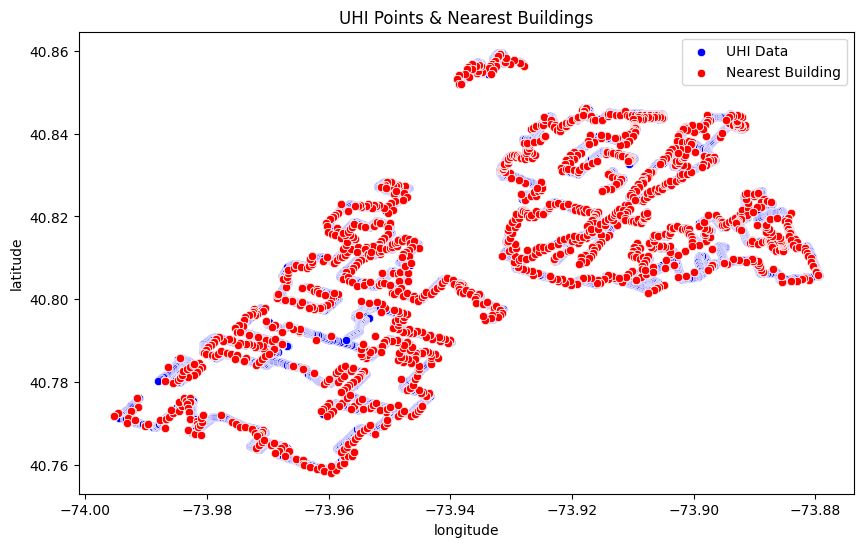

In [13]:
# 📌 Import Required Libraries
import pandas as pd
import geopandas as gpd
from scipy.spatial import cKDTree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------- 1️⃣ Utility Function: Standardize Column Names -----------------
def clean_column_names(df):
    """Cleans column names by replacing spaces, brackets, and special characters."""
    df.columns = (
        df.columns.str.strip()
        .str.lower()  # Convert to lowercase
        .str.replace(r"\[.*?\]", "", regex=True)  # Remove text inside brackets
        .str.replace(" ", "_")  # Replace spaces with underscores
        .str.replace("-", "_")  # Replace hyphens with underscores
    )
    return df

# ----------------- 2️⃣ Convert Building Footprint KML to CSV -----------------
kml_path = "../data/raw/Building_Footprint.kml"
csv_path = "../data/processed/building_footprints.csv"

# Convert KML to CSV only if not already processed
try:
    gdf = gpd.read_file(kml_path, driver="KML")
    gdf["centroid"] = gdf.geometry.centroid  # Extract centroid coordinates
    gdf = gdf[["centroid"]].copy()
    
    # Split centroid into Longitude & Latitude
    gdf["longitude"] = gdf["centroid"].apply(lambda point: point.x)
    gdf["latitude"] = gdf["centroid"].apply(lambda point: point.y)
    gdf.drop(columns=["centroid"], inplace=True)

    # Save to CSV
    gdf.to_csv(csv_path, index=False)
    print(f"✅ Converted KML to CSV: Saved as `{csv_path}`")

except Exception as e:
    print(f"⚠️ Error processing KML file: {e}")

# ----------------- 3️⃣ Load UHI + Weather Data -----------------
uhi_weather_path = "../data/processed/UHI_Weather_Merged.csv"
uhi_df = pd.read_csv(uhi_weather_path)
uhi_df = clean_column_names(uhi_df)  # Standardize column names
print(f"✅ UHI + Weather Data Loaded. Shape: {uhi_df.shape}")

# ----------------- 4️⃣ Load and Process Building Footprint Data -----------------
building_df = pd.read_csv(csv_path)
building_df = clean_column_names(building_df)  # Standardize column names
print(f"✅ Building Footprint Data Loaded. Shape: {building_df.shape}")

# Extract only centroid coordinates
building_df = building_df[['longitude', 'latitude']]

# ----------------- 5️⃣ Nearest Neighbor Mapping -----------------
def find_nearest_neighbors(uhi_coords, building_coords):
    """ Uses KDTree to find nearest building footprint for each UHI point """
    tree = cKDTree(building_coords)
    _, idx = tree.query(uhi_coords, k=1)  # Find the nearest neighbor
    return idx

# Convert coordinates to NumPy arrays
uhi_coords = np.array(uhi_df[['longitude', 'latitude']])
building_coords = np.array(building_df[['longitude', 'latitude']])

# Get nearest building indices
nearest_idx = find_nearest_neighbors(uhi_coords, building_coords)

# Merge the nearest building data
uhi_df['nearest_building_lon'] = building_df.iloc[nearest_idx]['longitude'].values
uhi_df['nearest_building_lat'] = building_df.iloc[nearest_idx]['latitude'].values

print("✅ Nearest Neighbor Mapping Done!")

# ----------------- 6️⃣ Save the Merged Data -----------------
final_output_path = "../data/processed/UHI_Weather_Building_Sentinel_LST_Merged.csv"
uhi_df.to_csv(final_output_path, index=False)
print(f"✅ Final dataset saved: {final_output_path}")

# ----------------- 🔍 7️⃣ Visualization -----------------
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', data=uhi_df, color='blue', label='UHI Data')
sns.scatterplot(x='nearest_building_lon', y='nearest_building_lat', data=uhi_df, color='red', label='Nearest Building')
plt.title("UHI Points & Nearest Buildings")
plt.legend()
plt.show()

In [14]:
import pandas as pd

# Load the newly merged dataset
df = pd.read_csv("../data/processed/UHI_Weather_Building_Sentinel_LST_Merged.csv")

# Check missing values
print("🔹 Missing Values Per Column:")
print(df.isnull().sum())

# Basic Statistics
print("\n📊 Dataset Summary:")
print(df.describe())

# Check First Few Rows
print("\n✅ Sample Data:")
print(df.head())

🔹 Missing Values Per Column:
datetime                0
longitude               0
latitude                0
uhi_index               0
land_surface_temp       0
band1                   0
band2                   0
band3                   0
band4                   0
air_temp_at_surface_    0
relative_humidity_      0
avg_wind_speed_         0
wind_direction_         0
solar_flux_             0
nearest_building_lon    0
nearest_building_lat    0
dtype: int64

📊 Dataset Summary:
          longitude      latitude     uhi_index  land_surface_temp  \
count  11229.000000  11229.000000  11229.000000       11229.000000   
mean     -73.933927     40.808800      1.000001          36.901146   
std        0.028253      0.023171      0.016238           2.460982   
min      -73.994457     40.758792      0.956122          27.702375   
25%      -73.955703     40.790905      0.988577          35.717631   
50%      -73.932968     40.810688      1.000237          37.177126   
75%      -73.909647     40.82451